# Predicting an Irish song:

Coursera link: https://www.coursera.org/learn/natural-language-processing-tensorflow/lecture/B80b0/notebook-for-lesson-1

In [0]:
import json
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers



2.2.0-rc1


In [0]:
# Text:
data = 'In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \n His father he died and made him a man again \n Left him a farm and ten acres of ground. \n He gave a grand party to friends and relations \n Who didnt forget him when it comes to the will, \n And if you will but listen I will make your eyes glisten \n Of the rows and the ructions of Lanigans Ball \n Myself to be sure got free invitation, \n For all the nice girls and boys I might ask, \n And just in a minute both friends and relations \n Were dancing around merry as bees around a cask. \n Judy ODaly, that nice little milliner, \n She tipped me a wink for to give her a call, \n And I soon arrived with Peggy McGilligan \n Just in time for Lanigans Ball.'

# Splitting the song by lines:
corpus = data.lower().split('\n')

# Creating the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)


{'and': 1, 'a': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'he': 7, 'him': 8, 'will': 9, 'i': 10, 'for': 11, 'friends': 12, 'relations': 13, 'lanigans': 14, 'ball': 15, 'nice': 16, 'just': 17, 'around': 18, 'town': 19, 'athy': 20, 'one': 21, 'jeremy': 22, 'lanigan': 23, 'battered': 24, 'away': 25, 'til': 26, 'hadnt': 27, 'pound': 28, 'his': 29, 'father': 30, 'died': 31, 'made': 32, 'man': 33, 'again': 34, 'left': 35, 'farm': 36, 'ten': 37, 'acres': 38, 'ground': 39, 'gave': 40, 'grand': 41, 'party': 42, 'who': 43, 'didnt': 44, 'forget': 45, 'when': 46, 'it': 47, 'comes': 48, 'if': 49, 'you': 50, 'but': 51, 'listen': 52, 'make': 53, 'your': 54, 'eyes': 55, 'glisten': 56, 'rows': 57, 'ructions': 58, 'myself': 59, 'be': 60, 'sure': 61, 'got': 62, 'free': 63, 'invitation': 64, 'all': 65, 'girls': 66, 'boys': 67, 'might': 68, 'ask': 69, 'minute': 70, 'both': 71, 'were': 72, 'dancing': 73, 'merry': 74, 'as': 75, 'bees': 76, 'cask': 77, 'judy': 78, 'odaly': 79, 'that': 80, 'little': 81, 'milline

In [0]:
# Sequences:
# instead of sequences the sentences only, we sequence each line in a sequence of adding a word each time until we sequence the whole line. then we move onto the next one and repeat.
# Example: [[In, the], [In, the, town], [In, the town, of,]... ]
# This is called: subsentence engrams.
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences)


# Pad sequences:
max_sequence_len = max(len(x) for x in input_sequences)
print(max_sequence_len)
max_sequence_len = max(map(lambda x : len(x), input_sequences)) # alternative!
print(max_sequence_len)

# For the padding it is important to add the zeros on the left, as we are gonna take the last word integer of each line as labels:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre', truncating='pre'))


# Create predictors and label:
# data examples will have as col size the  max sequence length because we have padded them so.
xs, labels = input_sequences[:,0:max_sequence_len-1], input_sequences[:,max_sequence_len-1]

# we one-hot vectorise the labels with the vocabulary size as dimension of the columns:
ys = to_categorical(labels, num_classes=vocab_size)  # tf.keras.utils.to_categorical function

print(len(xs))
print(xs.shape)
print(xs.shape[1])
print(ys.shape)

[[6, 3], [6, 3, 19], [6, 3, 19, 4], [6, 3, 19, 4, 20], [6, 3, 19, 4, 20, 21], [6, 3, 19, 4, 20, 21, 22], [6, 3, 19, 4, 20, 21, 22, 23], [24, 25], [24, 25, 26], [24, 25, 26, 7], [24, 25, 26, 7, 27], [24, 25, 26, 7, 27, 2], [24, 25, 26, 7, 27, 2, 28], [29, 30], [29, 30, 7], [29, 30, 7, 31], [29, 30, 7, 31, 1], [29, 30, 7, 31, 1, 32], [29, 30, 7, 31, 1, 32, 8], [29, 30, 7, 31, 1, 32, 8, 2], [29, 30, 7, 31, 1, 32, 8, 2, 33], [29, 30, 7, 31, 1, 32, 8, 2, 33, 34], [35, 8], [35, 8, 2], [35, 8, 2, 36], [35, 8, 2, 36, 1], [35, 8, 2, 36, 1, 37], [35, 8, 2, 36, 1, 37, 38], [35, 8, 2, 36, 1, 37, 38, 4], [35, 8, 2, 36, 1, 37, 38, 4, 39], [7, 40], [7, 40, 2], [7, 40, 2, 41], [7, 40, 2, 41, 42], [7, 40, 2, 41, 42, 5], [7, 40, 2, 41, 42, 5, 12], [7, 40, 2, 41, 42, 5, 12, 1], [7, 40, 2, 41, 42, 5, 12, 1, 13], [43, 44], [43, 44, 45], [43, 44, 45, 8], [43, 44, 45, 8, 46], [43, 44, 45, 8, 46, 47], [43, 44, 45, 8, 46, 47, 48], [43, 44, 45, 8, 46, 47, 48, 5], [43, 44, 45, 8, 46, 47, 48, 5, 3], [43, 44, 45, 

In [0]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

print(xs[6])
print(ys[6])

print(xs[5])
print(ys[5])

6
3
19
4
20
21
22
23
[ 0  0  0  0  6  3 19  4 20 21 22]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  0  0  0  0  6  3 19  4 20 21]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Building the RNN:
model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_sequence_len-1))  # input dimension=vocabulary size, output=embedding dimension, input length = pad length (remember we removed one to use it as label)
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=xs.shape[1]))  # input dimension=vocabulary size, output=embedding dimension, input length = pad length (remember we removed one to use it as label)
model.add(Bidirectional(LSTM(20)))
model.add(Dense(vocab_size, activation='softmax'))   # multi-class classification layer has vocabulary size as classes. And so we have to use softmax (because more than 2) instead of sigmoid; and categorical_crossentropy instead of binary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Adam seems to be a good optimizer for NLP!

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 64)            6144      
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 96)                3936      
Total params: 23,680
Trainable params: 23,680
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the NN:

num_epochs = 500

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    targ = 0.999
    if logs['accuracy']>targ :
      print('Reached %0.1f%% training accuracy. Training converged and stopping!' %(targ*100))
      self.model.stop_training = True

callback=myCallback()

history = model.fit(xs, ys, epochs=num_epochs , callbacks=[callback], verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5675 - accuracy: 0.0081
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 4.5588 - accuracy: 0.0244
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 4.5524 - accuracy: 0.0488
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 4.5461 - accuracy: 0.0650
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 4.5372 - accuracy: 0.0976
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 4.5293 - accuracy: 0.0976
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5196 - accuracy: 0.0813
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 4.5072 - accuracy: 0.0732
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 4.4915 - accuracy: 0.0732
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 4.4692 - accuracy: 0.0732
Epoch 11/500
4/4 [===========

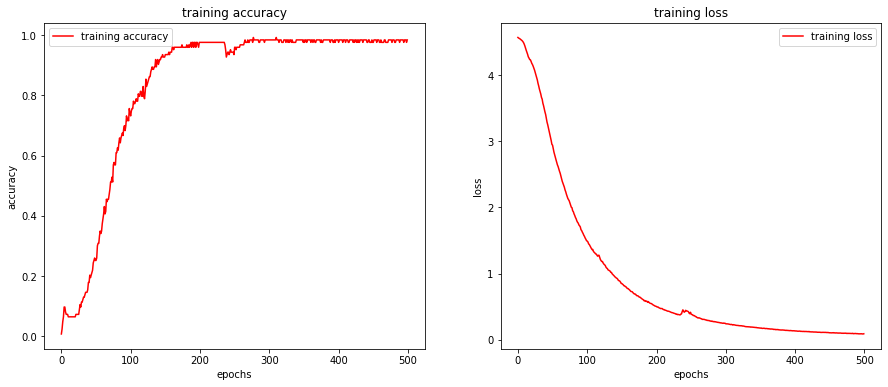

In [0]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']



plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(acc, 'r', label='training accuracy')
# plt.plot(val_acc, 'b', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'r', label='training loss')
# plt.plot(val_loss, 'b', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training loss')
plt.legend()

plt.show()


# Predicting words:

In [0]:
# Predicting words!

seed_text = 'Laurence went to dublin'
seed_text = 'Athy and his father went to dublin'
next_words = 10  # following 100 words to predict

# token_list = tokenizer.texts_to_sequences([seed_text])[0]
# print(token_list)
# token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre', truncating='pre') 
# print(token_list)

for _ in range(next_words):
  # Sequencing and padding the seed text for the prediction:
  token_list = tokenizer.texts_to_sequences([seed_text]) #[0]  # to sequence it, we have to convert the sentence to a list
  print(token_list)
  token_list = pad_sequences(token_list, maxlen=max_sequence_len-1, padding='pre', truncating='pre')  # we could use xs.shape[1] as maxlen too

  # Call the trainer prediction:
  # predicted = model.predict_classes(token_list)  # predict_classes is obsolete!
  predicted = np.argmax(model.predict(token_list), axis=-1)  # for multi-class classification using softmax as last layer activation; (model.predict(x)>0.5).astype('int32') for binary classification using sigmoid as last layer activation
  # print(predicted)

  # The predictor gives you the class index (integer) thus then we have to get the corresponding word from the dictionary.

  # Getting the predicted class index to its corresponding word in the dictionary/vocabulary :
  # This is: decoding the predicted class into the word from the dictionary:
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index==predicted:
      output_word = word
      break
  seed_text += ' ' + output_word  

# printing the result:
print(seed_text)



[20, 1, 29, 30, 5]
[[ 0  0  0  0  0  0 20  1 29 30  5]]
[[20, 1, 29, 30, 5]]
[[20, 1, 29, 30, 5, 9]]
[[20, 1, 29, 30, 5, 9, 10]]
[[20, 1, 29, 30, 5, 9, 10, 9]]
[[20, 1, 29, 30, 5, 9, 10, 9, 53]]
[[20, 1, 29, 30, 5, 9, 10, 9, 53, 54]]
[[20, 1, 29, 30, 5, 9, 10, 9, 53, 54, 55]]
[[20, 1, 29, 30, 5, 9, 10, 9, 53, 54, 55, 56]]
[[20, 1, 29, 30, 5, 9, 10, 9, 53, 54, 55, 56, 56]]
[[20, 1, 29, 30, 5, 9, 10, 9, 53, 54, 55, 56, 56, 56]]
Athy and his father went to dublin will i will make your eyes glisten glisten glisten glisten


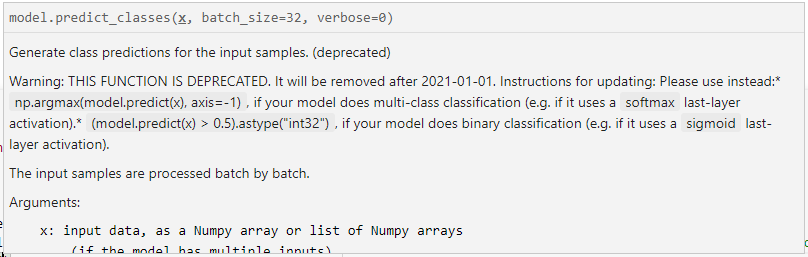